# <font color=purple> Lending Club Case Study <font>
<p>Lending Club is a marketplace for personal loans that matches borrowers who are seeking a loan with investors looking to lend money and make a return!<br>
The following case study involves in determining the possibility of loan applicants turning into default

### Table of contents 
1. Data Understanding 
2. Data Cleaning 
3. Data Manipulation 
4. Data Analysis
5. Recommendations

## <font color=brown>1. Data Understanding<font>
### <font color=#0f3fd1 >1.1 Importing required libraries<font>

In [111]:
import pandas as pd  #Data Cleaning and Analysis Libraries 
import numpy as np   #Scientific Computing Libraries
import matplotlib.pyplot as plt#Data Visualization Libraries
import seaborn as sns #Data Visualization Libraries
import plotly.express as px
import warnings 
warnings.filterwarnings('ignore')

### <font color=#0f3fd1 >1.2 Load the Data<font>

In [112]:
df = pd.read_csv("loan.csv")
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

### <font color=#0f3fd1 >1.3 Data overview <font>

In [113]:
#Basic Data Overview
print ("Number of Rows : " ,df.shape[0])
print ("Number of Columns : " ,df.shape[1])
print ("Data Types of column:\n",df.dtypes.value_counts())
print ("Features : \n" ,df.columns.tolist())


Number of Rows :  39717
Number of Columns :  111
Data Types of column:
 float64    74
object     24
int64      13
dtype: int64
Features : 
 ['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dt

In [114]:
print ("Number of Columns having all Null values:", len(df.columns[df.isnull().all()].tolist()))
print ("\nColumns having all Null values:\n", df.columns[df.isnull().all()].tolist())
print ("\nNumber of Missing values Count: ", df.isnull().sum().values.sum())
print ("\nSingle valued columns: \n",df.columns[df.nunique() == 1].tolist())

Number of Columns having all Null values: 54

Columns having all Null values:
 ['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', '

## <font color=brown>2. Data Cleaning <font>
### <font color=#0f3fd1 >2.1 Missing value<font>

In [115]:
#Removing Empty columns
df.dropna(axis = 1, how = 'all', inplace = True) 
print("Number of columns after removing empty columns",df.shape[1])

Number of columns after removing empty columns 57


In [116]:
#Columns having more than 50% of the null values
print(df.columns[100*df.isnull().mean() > 50].tolist())

['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d']


In [117]:
#Dropping columns which are more than 50% null 
df.drop(['mths_since_last_delinq','mths_since_last_record','next_pymnt_d'], axis = 1, inplace=True) 
print("Number of columns after removing 50% of the null values",df.shape[1])

Number of columns after removing 50% of the null values 54


### <font color=#0f3fd1 >2.2 Single value columns<font>
Removing Single value columns as they won't contribute to the analysis

In [118]:
singlevaluescol = ['pymnt_plan','initial_list_status','collections_12_mths_ex_med','policy_code','application_type','acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','tax_liens']
df.drop(singlevaluescol, axis = 1, inplace=True)
print("Number of columns after removing Single value columns ",df.shape[1])

Number of columns after removing Single value columns  45


### <font color=#0f3fd1 > 2.3 Feature selection<font>
Among 45 columns we need to identify the column required for analysis <br>

As we are analysizing the risky loan applicants before approving loan we can safely remove the column associated to Fully Paid applicants. From the given columns the following columns are related to fully Paid loan status which can be removed<br>

#### List of fully paid loans features which are obtained only when the loan is approved but not contributing to the loan defaulting analysis hence these columns has to be removed 
-  delinq_2yrs
-  out_prncp
-  out_prncp_inv
-  total_pymnt
-  total_pymnt_inv
-  total_rec_prncp
-  total_rec_int
-  total_rec_late_fee
-  recoveries
-  collection_recovery_fee
-  last_pymnt_d
-  last_pymnt_amnt
-  last_credit_pull_d

In [119]:
# Removing identity column as they do not contribute to the analysis
df.drop(['id','member_id'],axis = 1, inplace=True) 

In [120]:
#The following columns contain text data which do not contribute to the analysis and is irrelavent information 
df.drop(['emp_title','url','desc','title','zip_code'],axis = 1, inplace=True)

In [121]:
#Revoming Fully paid loans features
Customer_Behaviour_Variables = ['funded_amnt_inv','delinq_2yrs','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv',
                                'total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee'
                                ,'last_pymnt_d','last_pymnt_amnt','last_credit_pull_d']

df.drop(Customer_Behaviour_Variables, axis = 1, inplace=True)

#### We can determine loan are defaulted and not by analysizing either fully paid or charged off loans. Hence we are removing Current loans


In [122]:
LendingClubData = df[df.loan_status != "Current"]
print('Loan Status:', LendingClubData.loan_status.unique().tolist())

Loan Status: ['Fully Paid', 'Charged Off']


In [123]:
#missing value check
print(100*df.isnull().mean())

loan_amnt               0.000000
funded_amnt             0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_length              2.706650
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
addr_state              0.000000
dti                     0.000000
earliest_cr_line        0.000000
inq_last_6mths          0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.125891
total_acc               0.000000
pub_rec_bankruptcies    1.754916
dtype: float64


In [124]:
#Checking missing values in columns 
print("Columns having containing null values:", LendingClubData.columns[100*df.isnull().mean() != 0].tolist())
nullvaluecolumns = LendingClubData.columns[100*df.isnull().mean() != 0].tolist()

print("\nValue counts of these columns are listed below:")
for x in nullvaluecolumns:
    print(x,"\n",LendingClubData[x].value_counts(),"\n")

Columns having containing null values: ['emp_length', 'revol_util', 'pub_rec_bankruptcies']

Value counts of these columns are listed below:
emp_length 
 10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64 

revol_util 
 0%        954
0.20%      62
63%        62
40.70%     57
31.20%     57
         ... 
77.63%      1
25.74%      1
0.83%       1
47.36%      1
7.28%       1
Name: revol_util, Length: 1088, dtype: int64 

pub_rec_bankruptcies 
 0.0    36238
1.0     1637
2.0        5
Name: pub_rec_bankruptcies, dtype: int64 



In [125]:
#Removing the rows having null values in columns 'emp_length' and 'revol_util'
LendingClubData = LendingClubData[LendingClubData['emp_length'].notna()]
print("Null values in emp_length column",df.emp_length.isna().sum())

LendingClubData = LendingClubData[LendingClubData['revol_util'].notna()]
print("Null values in revol_util column",LendingClubData.revol_util.isna().sum())

Null values in emp_length column 1075
Null values in revol_util column 0


## <font color=brown>3. Data Manipulation<font>
### <font color=#0f3fd1 >3.1 Data Standardization<font>
    
From the datatable below we can dereive the following insights
-  "int_rate" column is described as an object column but has continous values.
-  "revol_util" column is described as an object column but has continous values.


In [126]:
pd.set_option("display.max_columns",None)
print ("Number of Columns : " ,df.shape[1])
LendingClubData.head()

Number of Columns :  24


,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies
0,5000,5000,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,Jan-85,1,3,0,13648,83.70%,9,0.0
1,2500,2500,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,Apr-99,5,3,0,1687,9.40%,4,0.0
2,2400,2400,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,Nov-01,2,2,0,2956,98.50%,10,0.0
3,10000,10000,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,Feb-96,1,10,0,5598,21%,37,0.0
5,5000,5000,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,Nov-04,3,9,0,7963,28.30%,12,0.0


In [127]:
#Removing '%' symbol from int_rate so as convert the column to numberic
LendingClubData['int_rate'] = LendingClubData['int_rate'].astype(str)
LendingClubData['int_rate'] = pd.to_numeric(LendingClubData['int_rate'].str.replace('%',''))

#Removing '%' symbol from revol_util so as convert the column to numberic
LendingClubData['revol_util'] = LendingClubData['revol_util'].astype(str)
LendingClubData['revol_util'] = pd.to_numeric(LendingClubData['revol_util'].str.replace('%',''))

In [128]:
#pd.set_option("display.max_columns",None)
LendingClubData.head()

,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies
0,5000,5000,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,Jan-85,1,3,0,13648,83.7,9,0.0
1,2500,2500,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,Apr-99,5,3,0,1687,9.4,4,0.0
2,2400,2400,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,Nov-01,2,2,0,2956,98.5,10,0.0
3,10000,10000,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,Feb-96,1,10,0,5598,21.0,37,0.0
5,5000,5000,36 months,7.90,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,Nov-04,3,9,0,7963,28.3,12,0.0


### <font color=#0f3fd1 >3.2 Data Format<font>
From the above table we can segregate continious numeric values and categorical values. The columns having less number of unique values are considered as Categorical values and the columns have discrete values are considered as Continious numeric values 

In [129]:
ContinuousNumericalVariables = ['loan_amnt','funded_amnt','int_rate','installment','annual_inc','dti','revol_bal','revol_util']
CategoricalVariables = ['term','grade','sub_grade','emp_length','home_ownership','verification_status','issue_d',
                        'loan_status','purpose','addr_state','earliest_cr_line','inq_last_6mths','open_acc','pub_rec',
                        'total_acc','pub_rec_bankruptcies']

In [130]:
#Check the Data Type of Continuous Numerical Variables in order to perform numerical analysis.
for x in ContinuousNumericalVariables:
    print(x, LendingClubData[x].dtype)

loan_amnt int64
funded_amnt int64
int_rate float64
installment float64
annual_inc float64
dti float64
revol_bal int64
revol_util float64


### <font color=#0f3fd1 >3.2 Outlier Treatment<font>
-  Loan Amount

Loan Amount before removing Outliners


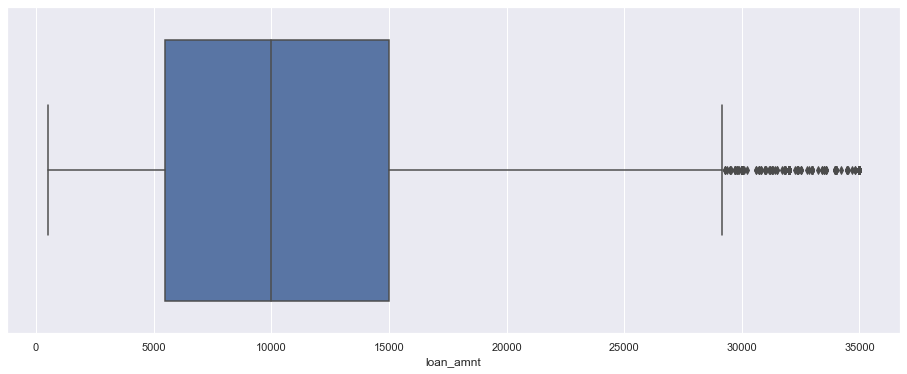

In [131]:
#From the box plot we see outliners present in 'loan_amnt' column which has to be corrected.
print("Loan Amount before removing Outliners")
sns.boxplot(LendingClubData['loan_amnt'])
plt.show()

In [132]:
#Determining the Inter-Quartile range to remove the outliners
print("Quartile range\n",LendingClubData.loan_amnt.quantile([0.85,0.90,0.95,0.96,0.965,0.97, 0.98, 0.99, 1.0]))

#From the Quartile Range below, we opt to remove the data lying above 97 Quartile range
per_97_loan_amnt = LendingClubData['loan_amnt'].quantile(0.97)
LendingClubData = LendingClubData[LendingClubData.loan_amnt <= per_97_loan_amnt]

Quartile range
 0.850    20000.0
0.900    21850.0
0.950    25000.0
0.960    25000.0
0.965    26500.0
0.970    28000.0
0.980    30000.0
0.990    35000.0
1.000    35000.0
Name: loan_amnt, dtype: float64


Loan Amount after removing Outliners


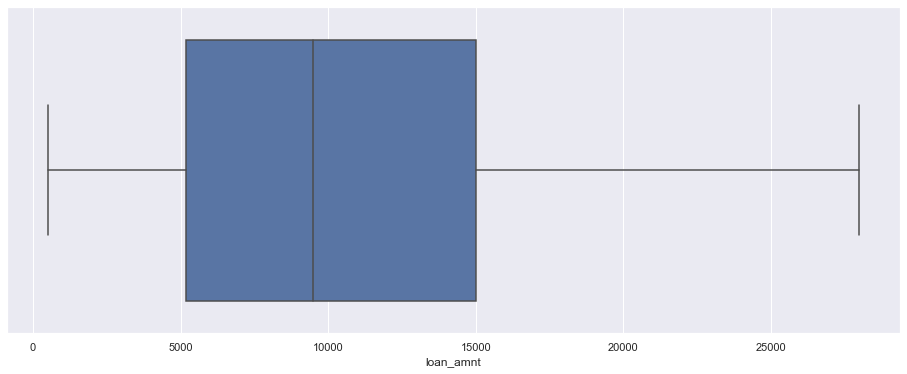

In [133]:
#Verifying the outliners after removing them
print("Loan Amount after removing Outliners")
sns.boxplot(LendingClubData['loan_amnt'])
plt.show()

Funded Amount before removing Outliners


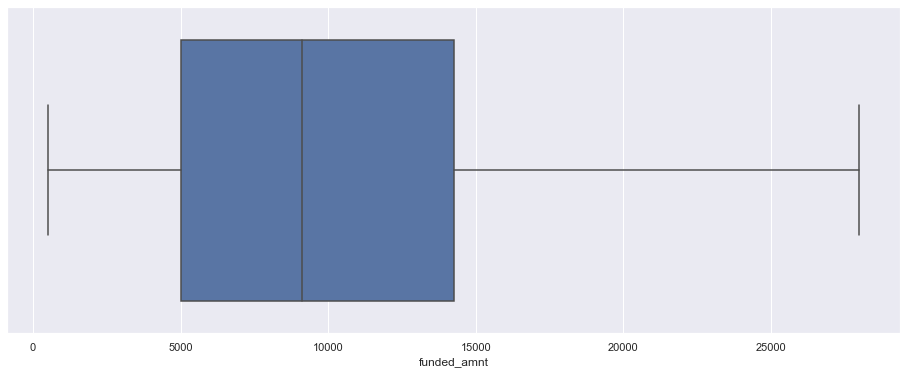

In [134]:
#From the diagram below we see that there are not outliners present in 'funded_amnt' column
print("Funded Amount before removing Outliners")
sns.boxplot(LendingClubData['funded_amnt'])
plt.show()

Annual Income before removing Outliners


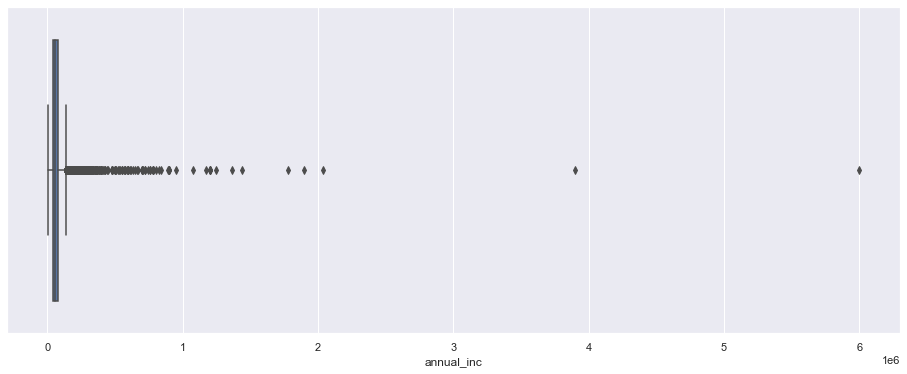

In [135]:
#From the box plot we see outliners present in 'annual_inc' column which has to be corrected.
print("Annual Income before removing Outliners")
sns.boxplot(LendingClubData['annual_inc'])
plt.show()

In [136]:
#Determining the Inter-Quartile range to remove the outliners
print("Quartile range\n",LendingClubData.annual_inc.quantile([0.75,0.80,0.85,0.90,0.95,0.96,0.97, 0.98, 0.99, 1.0]))

#From the Quartile Range below, we opt to remove the data lying above 95 Quartile range
per_95_annual_inc = LendingClubData['annual_inc'].quantile(0.95)
LendingClubData = LendingClubData[LendingClubData.annual_inc <= per_95_annual_inc]

Quartile range
 0.75      80000.00
0.80      89071.60
0.85      98400.00
0.90     112000.00
0.95     138000.00
0.96     147996.32
0.97     160000.00
0.98     180000.00
0.99     220000.00
1.00    6000000.00
Name: annual_inc, dtype: float64


Annual Income after removing Outliners


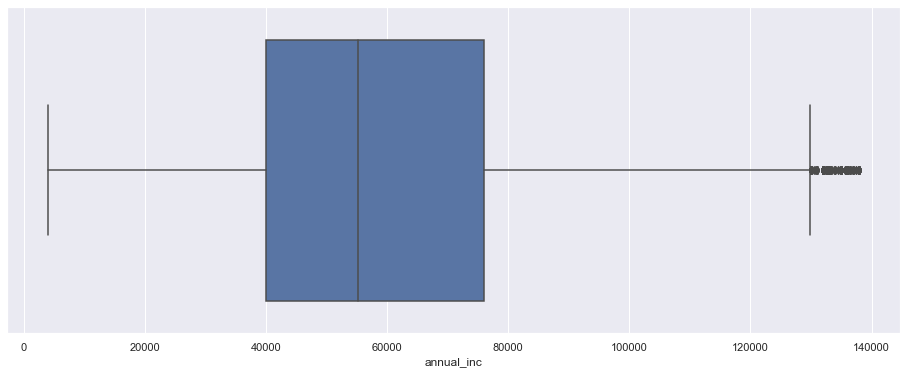

In [137]:
#Verifying the outliners after removing them
print("Annual Income after removing Outliners")
sns.boxplot(LendingClubData['annual_inc'])
plt.show()

dti before removing Outliners


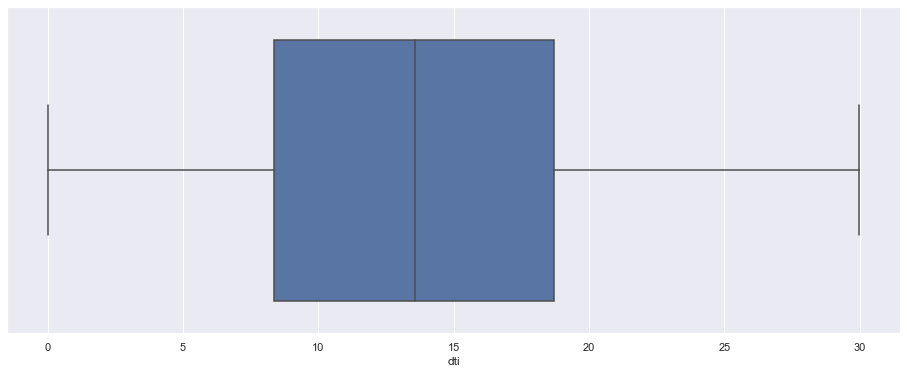

In [138]:
#From the diagram below we see that there are not outliners present in 'dti' column
print("dti before removing Outliners")
sns.boxplot(LendingClubData['dti'])
plt.show()

revol_bal before removing Outliners


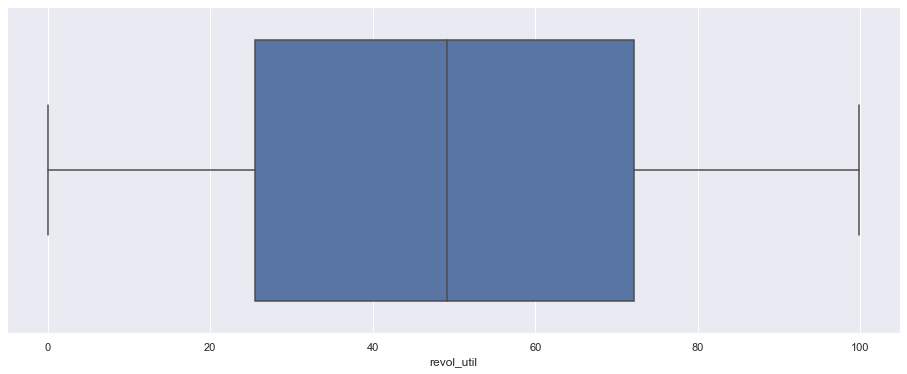

In [139]:
#From the diagram below we see that there are not outliners present in 'revol_util' column
print("revol_bal before removing Outliners")
sns.boxplot(LendingClubData['revol_util'])
plt.show()

## <font color=brown>4. Data Analysis<font>
### <font color=#0f3fd1 >4.1 Univariant Analysis<font>
-  Among the loan applicants most of have fully paid their loans
-  Among the loan applicants most of them opt for 36 months of Loan Term

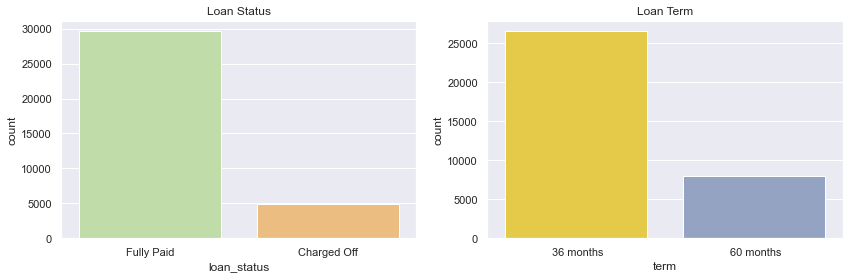

In [140]:
# Lets analyse the Loan Status and Loam Term
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
plt.title("Loan Status")
sns.countplot(x = 'loan_status', data = LendingClubData, palette='Spectral_r')

plt.subplot(1,2,2)
plt.title("Loan Term")
sns.countplot(x = 'term', data = LendingClubData, palette='Set2_r')
plt.show()

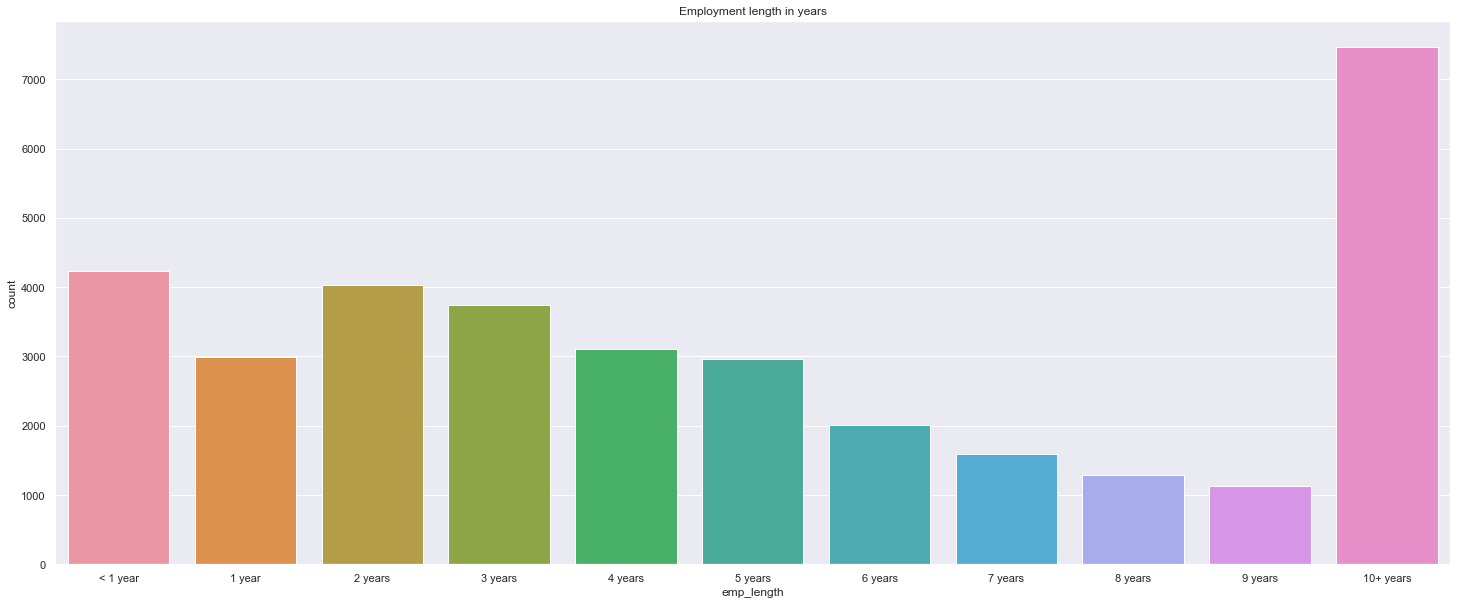

In [141]:
# Let analyse the Employement length of the applicants
plt.figure(figsize=(25,10))
plt.title("Employment length in years")
emp_order = ['< 1 year','1 year','2 years','3 years','4 years','5 years','6 years','7 years','8 years',
             '9 years','10+ years']
sns.countplot(x = 'emp_length', data = LendingClubData, order= emp_order)
plt.show()

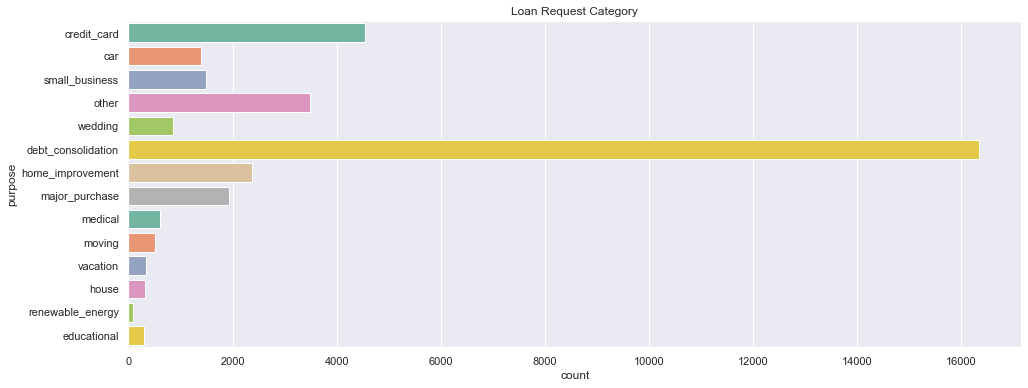

In [142]:
# Let try to analyse the reason for previous loan applications
plt.title("Loan Request Category")
sns.countplot(y = 'purpose', data = LendingClubData, palette='Set2')
plt.show()

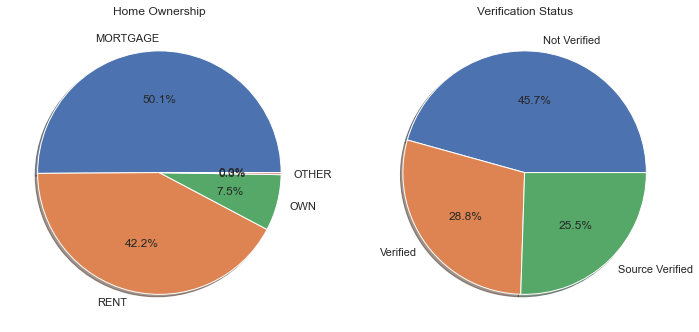

In [143]:
# Let analyse the loan verification status of the applicants
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.pie(LendingClubData['home_ownership'].value_counts(), labels = ['MORTGAGE','RENT','OWN','OTHER',''], shadow=True, 
        autopct='%1.1f%%')
plt.title('Home Ownership')

plt.subplot(1,2,2)
plt.pie(LendingClubData['verification_status'].value_counts(), labels = ['Not Verified','Verified','Source Verified'], 
        shadow=True, autopct='%1.1f%%')
plt.title('Verification Status')
plt.show()

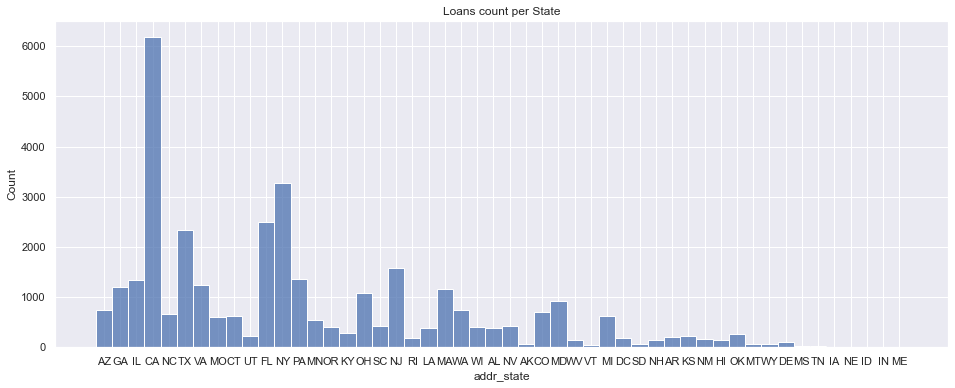

In [144]:
# lets see which state has highest loan applicants
sns.set(rc={'figure.figsize':(16,6)})
plt.title('Loans count per State')
sns.histplot(LendingClubData["addr_state"])
plt.show()

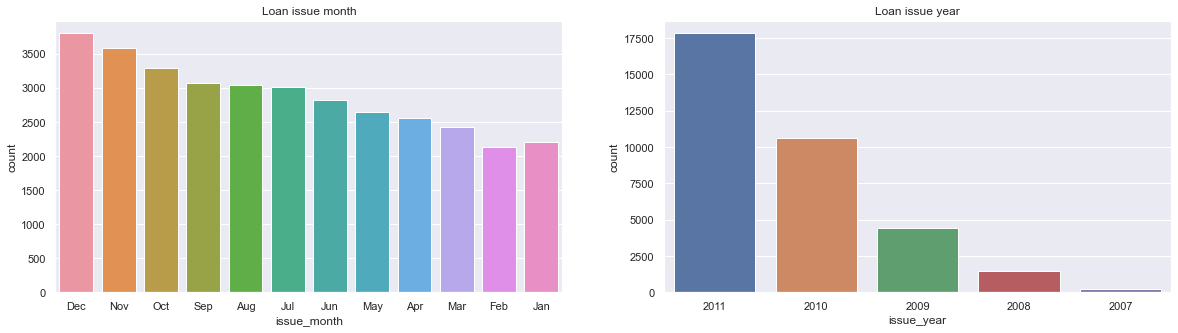

In [145]:
# lets see if the year and month has data for analysis
df_month_year = LendingClubData['issue_d'].str.partition("-", True)     
LendingClubData['issue_month']=df_month_year[0]                       
LendingClubData['issue_year']='20' + df_month_year[2]

plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.title('Loan issue month')
sns.countplot(x='issue_month', data=LendingClubData)
plt.subplot(1,2,2)
plt.title('Loan issue year')
sns.countplot(x='issue_year', data=LendingClubData)
plt.show()

In [146]:
bins = np.linspace(min(LendingClubData['loan_amnt']), max(LendingClubData['loan_amnt']), 5)
print('The bins created for Loan amount are as follows:',bins.tolist())

The bins created for Loan amount are as follows: [500.0, 7375.0, 14250.0, 21125.0, 28000.0]


In [147]:
group_names = ['500-8000','8000-15000','15000-21000','21000-28000']
LendingClubData['loan_amnt-binned'] =pd.cut(LendingClubData['loan_amnt'], bins, labels=group_names, include_lowest=True )

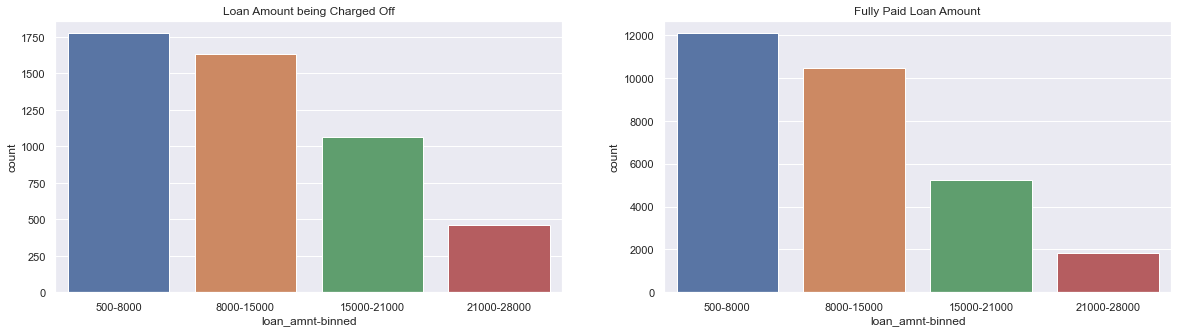

In [148]:
#Observation 
# Loan applicants being Charged off is found maximun in the loan amount range 500-8000k
# Loan applicants being Charged off is found minimum in the loan amount range 21000-28000k
# Fully paid Loan applicants is found minimum in the loan amount range 21000-28000k and maximun in range 500-8000k
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.title('Loan Amount being Charged Off')
sns.countplot(x='loan_amnt-binned', data=LendingClubData[LendingClubData['loan_status']=='Charged Off'])
plt.subplot(1,2,2)
plt.title('Fully Paid Loan Amount')
sns.countplot(x='loan_amnt-binned', data=LendingClubData[LendingClubData['loan_status']=='Fully Paid'])
plt.show()

In [149]:
bankruptciesloanStatus = LendingClubData.groupby(['pub_rec_bankruptcies', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
bankruptciesloanStatus['Total']=bankruptciesloanStatus['Charged Off']+bankruptciesloanStatus['Fully Paid'] 
bankruptciesloanStatus['Chargedoff_Proportion'] = bankruptciesloanStatus['Charged Off'] / bankruptciesloanStatus['Total']
bankruptciesloanStatus['Fully Paid_Proportion'] = bankruptciesloanStatus['Fully Paid'] / bankruptciesloanStatus['Total']

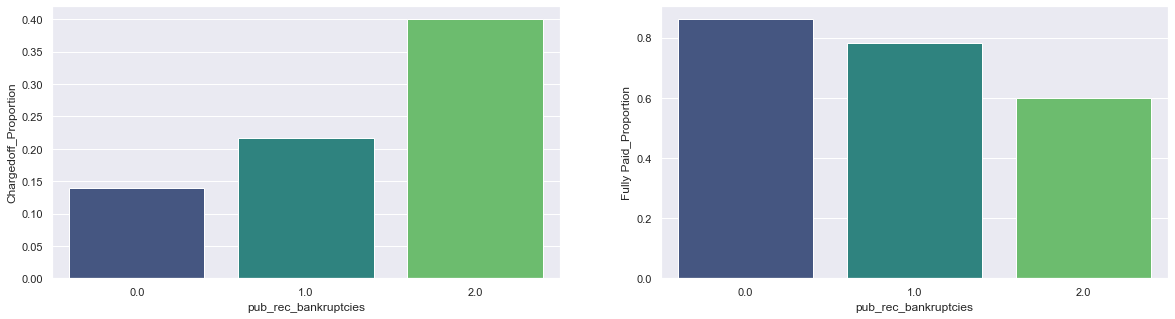

In [150]:
#Observation 
# Loan applicants having more public records of bankruptcies are less likely to fully pay the loan resulting in being detained
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.barplot(data = bankruptciesloanStatus, x='pub_rec_bankruptcies', y ='Chargedoff_Proportion',
            palette="viridis")
plt.subplot(1,2,2)
sns.barplot(data = bankruptciesloanStatus, x='pub_rec_bankruptcies', y ='Fully Paid_Proportion',
            palette="viridis")
plt.show()

### <font color=#0f3fd1 >4.2 Segmented univariate Analysis<font>

<AxesSubplot:title={'center':'Grade vs Loan Amount'}, xlabel='grade', ylabel='loan_amnt'>

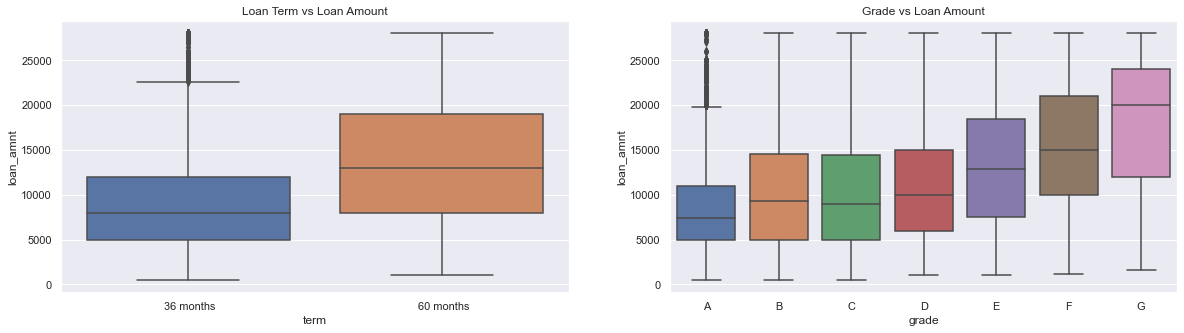

In [174]:
#Lets analyse Loan Amount, Loan term
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.boxplot(data=LendingClubData,x='term', y=LendingClubData.loan_amnt)
plt.title('Loan Term vs Loan Amount')
plt.subplot(1,2,2)
plt.title('Grade vs Loan Amount')
#Analysis Grade with Loan Amount
grade_ord = LendingClubData.grade.unique()
grade_ord.sort()
sns.boxplot(data=LendingClubData, x='grade', y=LendingClubData.loan_amnt, order = grade_ord)

### <font color=#0f3fd1 >4.3 Bivariant Analysis<font>

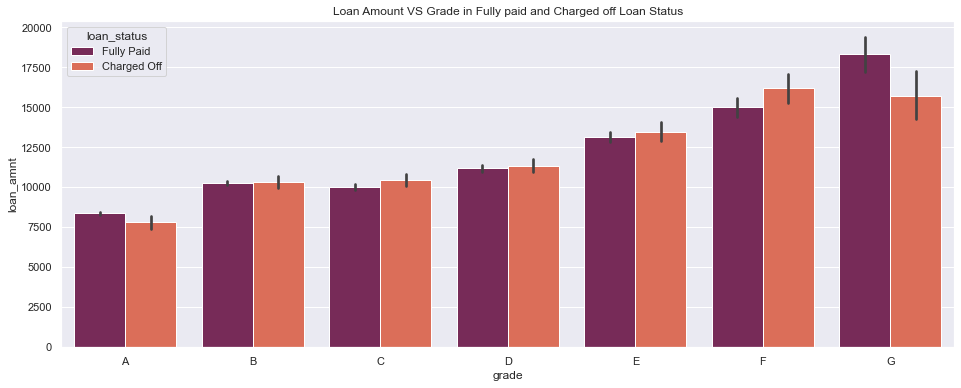

In [151]:
#Observation
#Number of defaulters are significantly increases within grade 'B' and 'F'. 
#As the Grades define the interest rate it is evident that there is an increase in defaulters

class_order = ['A','B','C','D','E','F','G']
sns.barplot(data = LendingClubData, x='grade', y='loan_amnt', hue ='loan_status',palette="rocket", order = class_order)
plt.title('Loan Amount VS Grade in Fully paid and Charged off Loan Status')
plt.show()

In [152]:
int_rate_bins = np.linspace(min(LendingClubData['int_rate']), max(LendingClubData['int_rate']), 7)
print('The bins created for Loan amount are as follows:',int_rate_bins.tolist())

The bins created for Loan amount are as follows: [5.42, 8.583333333333332, 11.746666666666666, 14.909999999999998, 18.07333333333333, 21.236666666666665, 24.4]


In [153]:
int_rate_group = ['5% - 8%','8% - 11%','11% - 14%','14% - 18%','18% - 21%','21% - 24%']
LendingClubData['int_rate_binned'] =pd.cut(LendingClubData['int_rate'], int_rate_bins, labels=int_rate_group, 
                                           include_lowest=True )

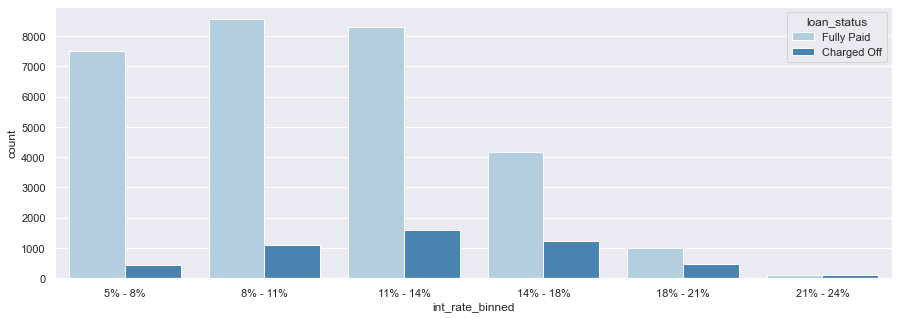

In [154]:
#Observation
#Number of defaulters are significantly high between the interest rate 8% to 18% 
#Number of defaulters are least in the interest range 21% - 24%

plt.figure(figsize=(15,5))
sns.countplot(data = LendingClubData, x='int_rate_binned', hue ='loan_status',palette="Blues")
plt.show()

In [155]:
annual_inc_bins = np.linspace(min(LendingClubData['annual_inc']), max(LendingClubData['annual_inc']), 12)
print('The bins created for Annual Income are as follows:',annual_inc_bins.tolist())

The bins created for Annual Income are as follows: [4000.0, 16181.818181818182, 28363.636363636364, 40545.454545454544, 52727.27272727273, 64909.09090909091, 77090.90909090909, 89272.72727272728, 101454.54545454546, 113636.36363636363, 125818.18181818182, 138000.0]


In [156]:
annual_inc_group = ['4000.0 - 16000','16000 - 28000','28000 - 40000','40000 - 52000','52000 - 64000','64000 - 77000',
                 '77000 - 89000','89000 - 100000','100000 - 110000','110000 - 120000','120000 - 130000+']

LendingClubData['annual_inc_binned'] =pd.cut(LendingClubData['annual_inc'], annual_inc_bins, labels=annual_inc_group, 
                                           include_lowest=True )

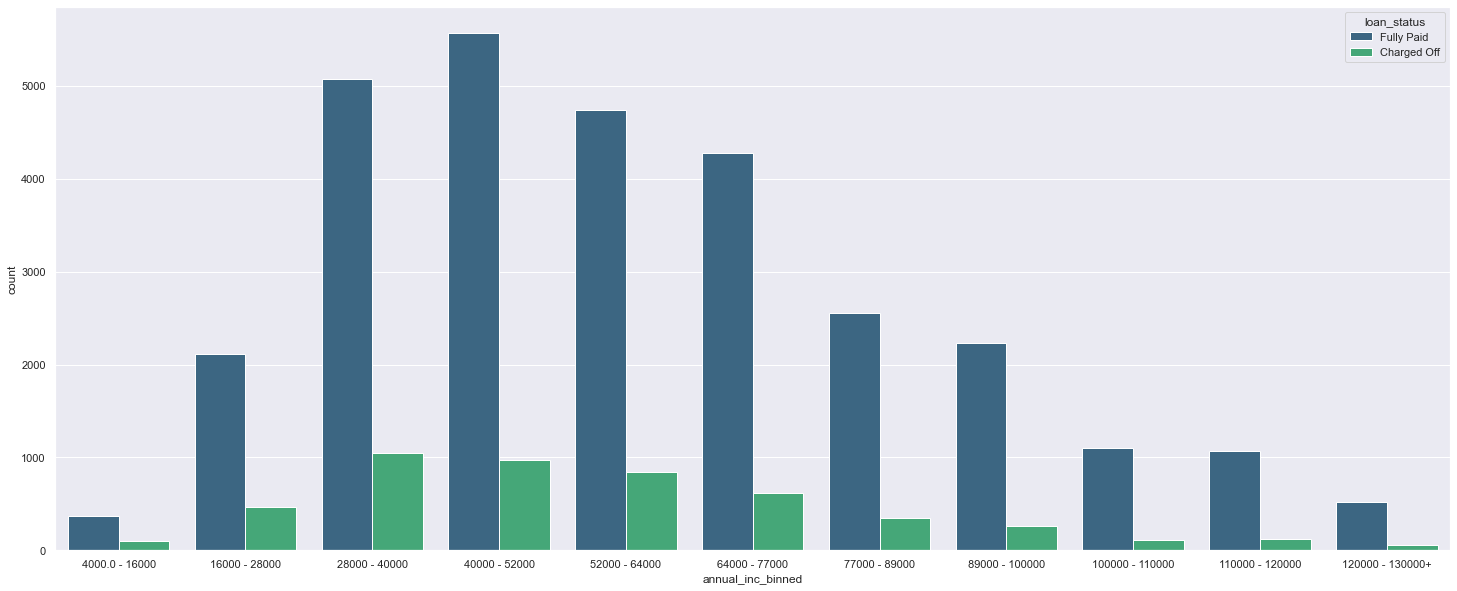

In [157]:
# Observations:
# Income range 100000+  has less chances of charged off.
# Income range 16000-80000 has high chances of charged off.
# Increase in annual income decreases applicants being charged off.
plt.figure(figsize=(25,10))
sns.countplot(data = LendingClubData, x='annual_inc_binned', hue ='loan_status',palette="viridis")
plt.show()

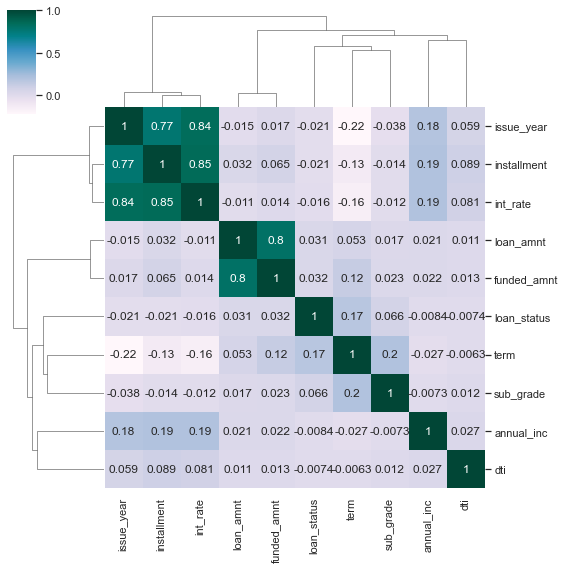

In [158]:
# Observation 
# Loan amount, funding amount are strongly correlated.
# Issue year, Installment and interest rate are strongly correlated.

variables = ['loan_amnt','funded_amnt','term','installment','annual_inc','dti','issue_year','loan_status',
             'int_rate','sub_grade']
sns.clustermap(data=LendingClubData[variables].apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1), 
               cmap='PuBuGn', figsize=(8,8), annot=True)
plt.show()

Index(['loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'addr_state', 'dti', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'pub_rec_bankruptcies', 'issue_month', 'issue_year', 'loan_amnt-binned',
       'int_rate_binned', 'annual_inc_binned'],
      dtype='object')


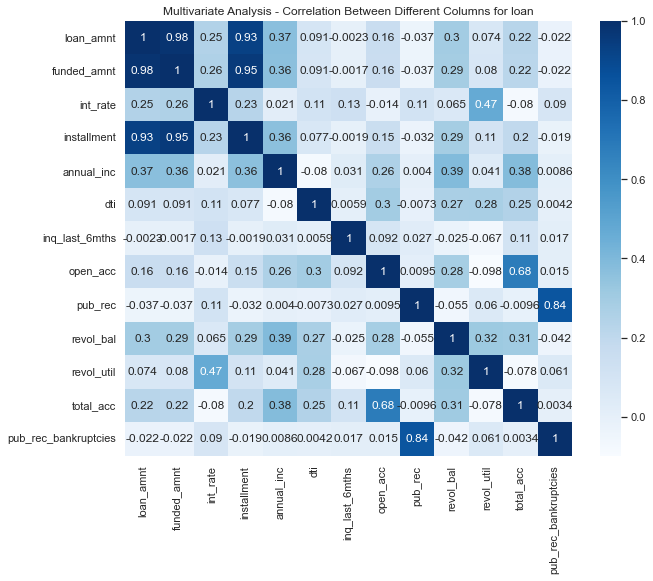

In [167]:
# Let try to check correlation betweeen all the columns and see the results
print(LendingClubData.columns)
corrMatrix = LendingClubData.corr()

plt.figure(figsize = [10,8])
sns.heatmap(data = corrMatrix, annot = True, cmap = 'Blues')
plt.title('Correlation Between Different Columns for loan')
plt.show()

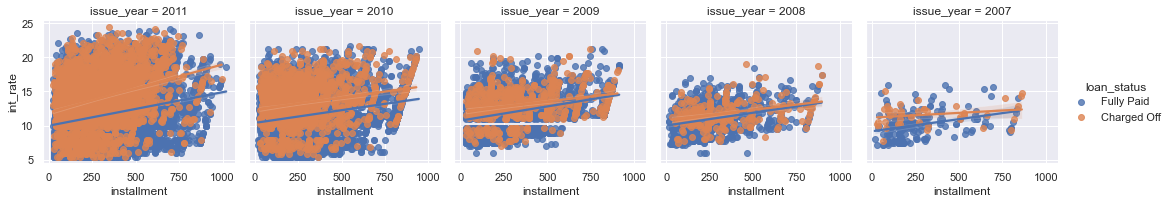

In [160]:
#Observation
#Correlation between the Installment and the Interest rate is shown
#Interest rate and Installment are positively correlated and increasing the passing year 

graph = sns.FacetGrid(LendingClubData, col ='issue_year', hue ='loan_status')
# map the above form facetgrid with some attributes
graph.map(sns.regplot, "installment", "int_rate").add_legend()
# show the object
plt.show()

## <font color=brown>5. Recommendations<font>

DRIVING FACTORS for Defaulters
-  Loan Purpose: The top two reasons for loans are debt consolidation and credit card. Such applications should be carefully   assessed.
-  Loan Amount: Defaulter rate increases as the requested loan amount increases
-  Grade: Number of defaulters are significantly increases within grade 'B' and 'F'. As the Grades define the interest rate it is evident that there is an increase in defaulters
-  Public Records of Bankruptcies: Loan applicants having more public records of bankruptcies are less likely to fully pay the loan resulting in being detained
-  Interest Rate: Number of defaulters are significantly high between the interest rate 8% to 18% . Number of defaulters are least in the interest range 21% - 24%
-  Annual Income: Income range 100000+  has less chances of charged off. Income range 16000-80000 has high chances of charged off. Increase in annual income decreases applicants being charged off.
-  Employment Length: Maximum number of defaulters have 10/10+ years of experience and 0 to 2 years of experience. Hence, LC should be take this aspect into consideration while lending loans. 